<a href="https://colab.research.google.com/github/sinjimin/gnb_2022_1_Ai_team2/blob/master/week1/week1_jiminshin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
x=[-3,31,-11,4,0,22,-2,-5,-25,-14]
y=[-2,32,-10,5,1,23,-1,-4,-24,-13]
print(x)
print(y)

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
[-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


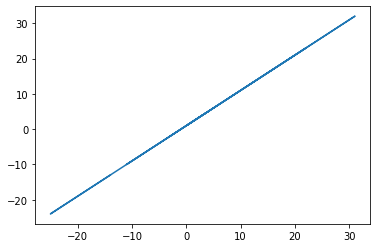

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

matplotlib은 파이썬 안에서 그래프를 그리기 위해 사용하는 라이브러리이다. 그 중 plt.plot()은 라인플롯을 나타낸다. 히스토그램은 plt.hist(), 산점도는 plt.scatter()으로 나타낸다.

또한 이와 같은 과정을 데이터 탐색 과정이라고 한다.x와 y 변수 사이의 관계식을 그래프로 그려낸다.

In [ ]:
import pandas as pd
df=pd.DataFrame({'X':x,'Y':y})
df.shape

(10, 2)

shape : 행과 열의 개수를 튜플로 반환
형식 : dataframe 명.shape

In [ ]:
df.head()

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1


.head()함수는 불러온 데이터의 상위 5개의 행을 출력합니다.괄호 () 안에 원하는 숫자를 넣으면 그 숫자만큼 행을 출력합니다.                                                           

In [ ]:
df.tail()

,X,Y
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


.tail()함수는 불러온 데이터의 하위 5개의 행을 출력합니다. 괄호()안에 원하는 숫자를 넣으면 그 숫자만큼 행을 출력합니다.

In [ ]:
train_features=['X']
target_cols=['Y']
X_train = df.loc[:,train_features]
Y_train = df.loc[:,target_cols]
print(X_train.shape, Y_train.shape)

(10, 1) (10, 1)


예측 목표가 되는 Y변수를 target, 예측하는 데 사용되는 X변수를 feature이라고 한다. 
X열의 데이터를 선택해 X_train에 저장하고 Y열의 데이터를 선택해 y_train에 저장한다.


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

사이킷런(sklearn) 패키지의 linear_module 모듈에서 LinearREgression 클래스 함수를 불러서 사용한다.
LinearRegression 클래스 함수는 선형회귀 모델을 구현해 놓은 코드이다. 모델 인스턴스 객체를 생성하고 lr변수에 저장한다.
fit 메소드는 입력 데이터를 모델에 전달한 뒤 학습시키는 함수이다. 입력 데이터와 목표 레이블을 전달하면서 선형관계식을 찾아준다.

//객체는 소프트웨어 세계에 구현할 대상이고, 이를 구현하기 위한 설계도가 클래스이며, 이 설계도에 따라 소프트웨어 세계에 구현된 실체가 인스턴스이다.

In [ ]:
lr.coef_,lr.intercept_

(array([[1.]]), array([1.]))

학습을 끝낸 lr 모델 인스턴스 객체의 coef_ 속성으로부터 x변수의 기울기(회귀계수)를 얻을 수 있다. intercept_속성은 y절편(상수항)을 나타낸다.

In [ ]:
print("기울기",lr.coef_[0][0])
print("y절편",lr.intercept_[0])

기울기 0.9999999999999999
y절편 0.9999999999999999


x변수의 회계계수가 1이고 상수항은 1이므로 lr 모델은 y=x+1의 관계식을 갖는다. 

In [ ]:
import numpy as np
X_new=np.array(11).reshape(1,1)
lr.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[12.]])

학습을 마친 모델에 predict 메소드를 적용하면, 새로운 x에 대한 y를 예측할 수 있다. 이때, 학습에 사용한 x_train이 2차운 구조였으므로, predict 메소드의 입력값 또한 2차원 구조로 넘겨줘야 한다.

넘파이 라이크러리의 array()로 숫자 11을 배열로 변환하고, reshape()을 이용해 (1행,1열) 형태의 2차원 구조로 변환한다. 

In [ ]:
X_test = np.arange(11,16,1).reshape(-1,1)
X_test 

array([[11],
       [12],
       [13],
       [14],
       [15]])

predict 메소드에 여러개의 입력 데이터를 넣을 수도 있다. numpy 모듈의 arange 함수를 사용한다. 
np.arange(11,16,1): 11부터 15까지 1의 간격을 두고 1차원 배열을 만들 것
reshape(-1,1): (n행, 1열) 형태의 2차원 구조로 변환할 것. 여기서 -1은 크기가 정해지지 않았다는 뜻이다. 현재 모두 5개의 원소가 있으므로 -1은 5를 의미하게 되면서 5개의 행을 출력한다. 

In [ ]:
y_pred=lr.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])

여러 개의 입력 데이터를 통해 예측한 값을 y_pred에 넣어준다. 옳은 결과가 출력된다. 